<a href="https://colab.research.google.com/github/juel-123/Mobile_price_prediction.ipynb/blob/main/Mobile_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Title : Mobile price Prediction**

**Project type :Classification**

**Contribution: Indiviual**

#*Github link :*

#*Problem Statement*



* Now a days mobile phones are very much neccessary to the indiviuals with best specification.  

*  Mobile phone come in all sort of prices, features ,specifications and all.price estimation and prediction is an important part of consumer strategy. Deciding on the correct price of the product is very important for the market success of a product. A new prooduct that has to be launched must have the correct price so that consumers find it appropriate to buy the product.
* In the competitive mobile phone market companies want to understand the sales data of mobile phones and factors that drives the prices.  

*   The main objective of this project is to build a model which will classify the price range of the mobile phones based on the specification of the mobile phones.



#*Importing libraries*

In [70]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report,precision_score,recall_score,f1_score,roc_curve,auc, roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#*Importing Dataset*

In [13]:
#importing the dataset
df = pd.read_csv('/content/drive/MyDrive/data_mobile_price_range.csv')

In [14]:
# head of the dataset
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [15]:
# tail of the dataset
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [16]:
# shape of the dataset
df.shape

(2000, 21)

There are 2000 rows and 21 columns

In [17]:
# information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

##*Data description*

*The given features description:*

*  battery_power :Battery acpacvity in mAh
*  blue	 : Has Bluetooth or not
* clock_speed : Speed at which microprocessor executes instructions
* dual_sim  :Has dual sim support or not
* fc :Front camera megapixel
* four_g : Has 4G or not
* int_memory :Internal memory capacity
* m_dep : Mobile depth in cm
* mobile_wt  :Weight of mobile phones
* n_cores  : Nuber of cores in processor
* pc  :Primary camera in megapixels
* px_height  :Pixel resolution height
* px_width : Pixel resolution width
* ram  :Random access memory in MB
* sc_h  :screen height
* sc_w  :screen width
* talk_time : Longest that a single memory last over a call
* three_g  :Has 3G or not
* touch_screen : Touch screen or not
* wifi :Has wifi or not
* price_range :This is the target variable with value 0 (low cost),1(medium cost),2(high cost),3(very high cost)

###*Checking whether the data is  clean or not*

In [18]:
# checking the duplicate data
df[df.duplicated].sum()

battery_power    0.0
blue             0.0
clock_speed      0.0
dual_sim         0.0
fc               0.0
four_g           0.0
int_memory       0.0
m_dep            0.0
mobile_wt        0.0
n_cores          0.0
pc               0.0
px_height        0.0
px_width         0.0
ram              0.0
sc_h             0.0
sc_w             0.0
talk_time        0.0
three_g          0.0
touch_screen     0.0
wifi             0.0
price_range      0.0
dtype: float64

There are no duplicated values in the dataset

In [19]:
# checking the null values
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

There are no null values in the Dataset

###*Statistical Information*

In [20]:
# getting statistical  information of the features
df.describe(include = 'all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


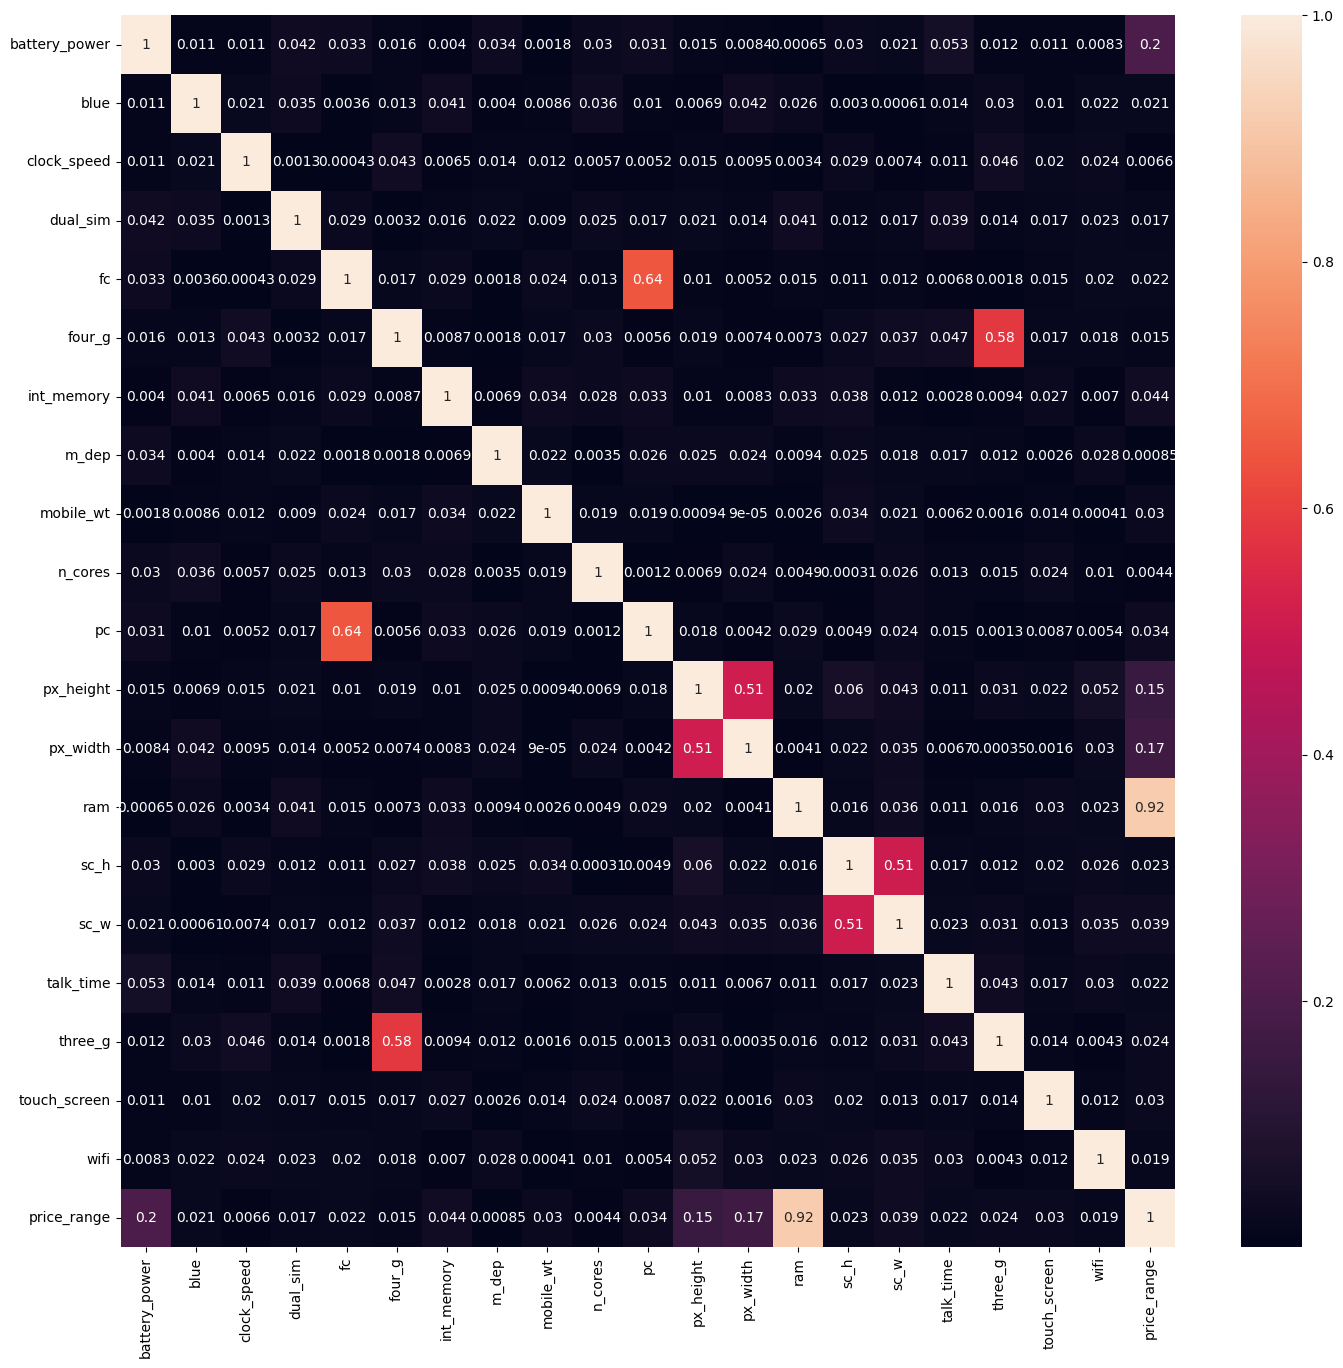

In [21]:
#  Let's see the correlation of each feature
correlation =  df.corr()
plt.figure(figsize=(17,16))
sns.heatmap(abs(correlation),annot=True)
plt.show()

Here after seeing Heat map,The correlation of independent features are not that highly correlated with each other which would lead to multicollinearity, which can affect the performance and interpretability of our model.

In [22]:
#  columns in the dataset
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [23]:
#no.of unique features
for i in df.columns:
  unique_count = df[i].nunique()
  print(f"The number of items in '{i}':{unique_count}")

The number of items in 'battery_power':1094
The number of items in 'blue':2
The number of items in 'clock_speed':26
The number of items in 'dual_sim':2
The number of items in 'fc':20
The number of items in 'four_g':2
The number of items in 'int_memory':63
The number of items in 'm_dep':10
The number of items in 'mobile_wt':121
The number of items in 'n_cores':8
The number of items in 'pc':21
The number of items in 'px_height':1137
The number of items in 'px_width':1109
The number of items in 'ram':1562
The number of items in 'sc_h':15
The number of items in 'sc_w':19
The number of items in 'talk_time':19
The number of items in 'three_g':2
The number of items in 'touch_screen':2
The number of items in 'wifi':2
The number of items in 'price_range':4


###*Visualization of Dependent variable*

In [24]:
# dependent feature
dependent_feature=['price_range']

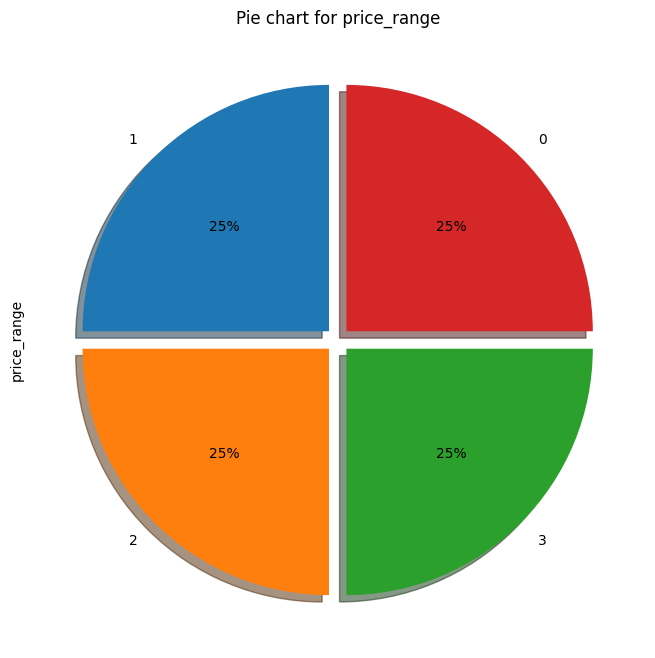

In [25]:
df['price_range'].value_counts().plot.pie(explode = [0.05,0.05,0.05,0.05],autopct= '%d%%', startangle= 90, shadow = True, figsize=(8,8))
plt.title('Pie chart for price_range')
plt.show()

In [26]:
x = pd.DataFrame(df.groupby('price_range').count())
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
price_range,,,,,,,,,,,,,,,,,,,,
0,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500
1,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500
2,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500
3,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500


The count of each item in 'price_range' is 500

###*Relation between price_range and battery_power*

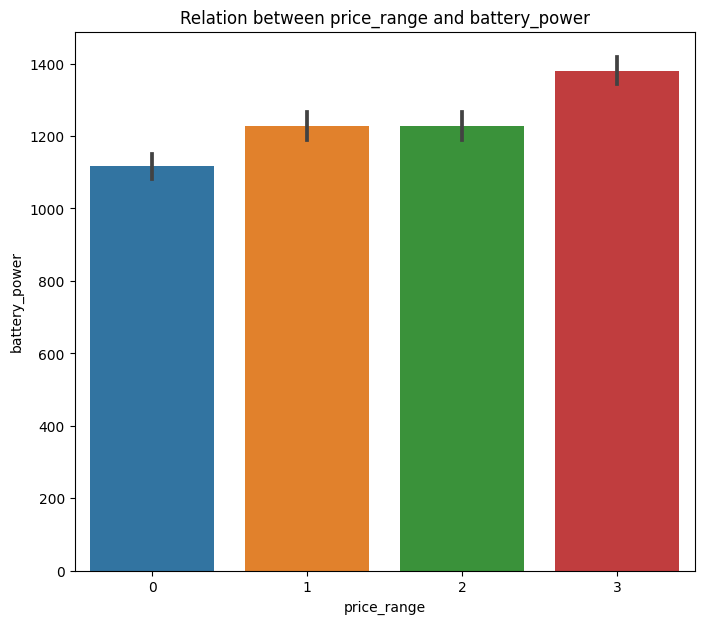

In [27]:
# visualizing price_range and battery power
plt.figure(figsize=(8,7))
sns.barplot(x= df['price_range'] ,y= df['battery_power'], data=df)
plt.xlabel('price_range')
plt.ylabel('battery_power')
plt.title('Relation between price_range and battery_power')
plt.show()

From the visualization we can infer that price_range having (0) has the lowest battery life and the price_range having (3) has the highest battery life.

###*Relation between px_width,px_height and price_range*

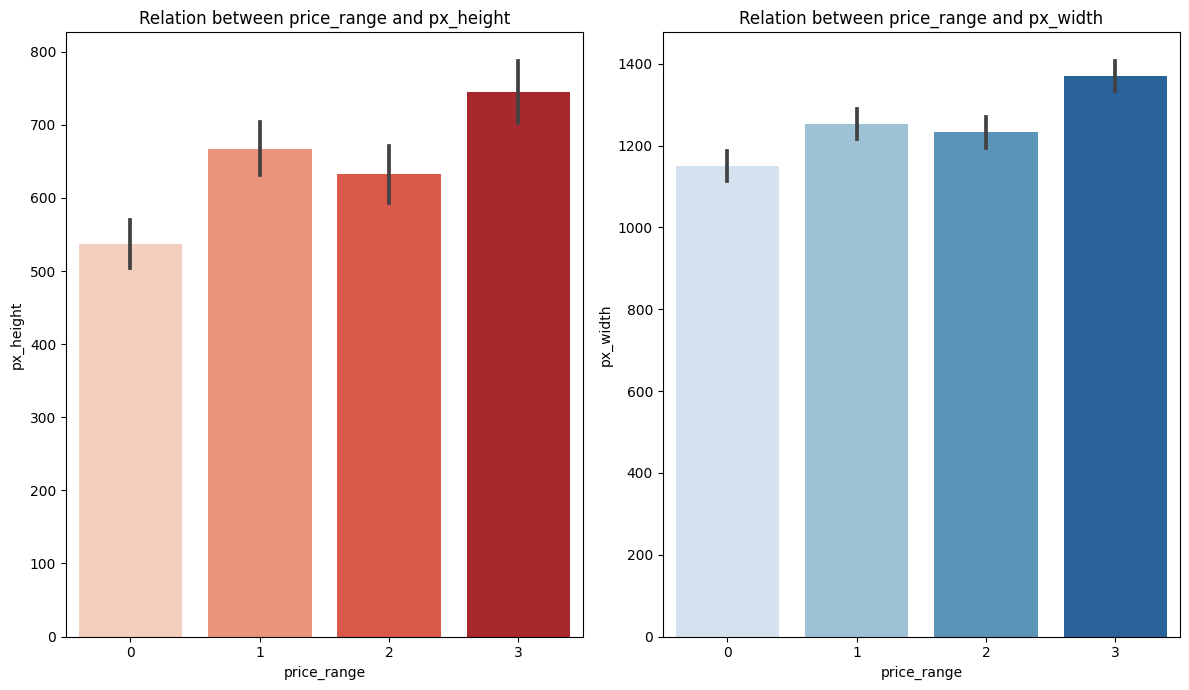

In [28]:
# visualizing Relation between px_width,px_height and price_range
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
sns.barplot(x= 'price_range',y='px_height',data  =df,palette='Reds')
plt.xlabel('price_range')
plt.ylabel('px_height')
plt.title('Relation between price_range and px_height')
plt.subplot(1,2,2)
sns.barplot(x= 'price_range',y='px_width',data=df,palette='Blues')
plt.xlabel('price_range')
plt.ylabel('px_width')
plt.title('Relation between price_range and px_width')
plt.tight_layout()
plt.show()

*   In case of pixel  resolution height(px_height): The price_range(0) has the lowest px_height and the price_range(3) has highest px_height.
    
*   In case of pixel  resolution width(px_width): The price_range(0) has the lowest px_width and the price_range(3) has highest px_width.


###*Relation between price_range and ram*

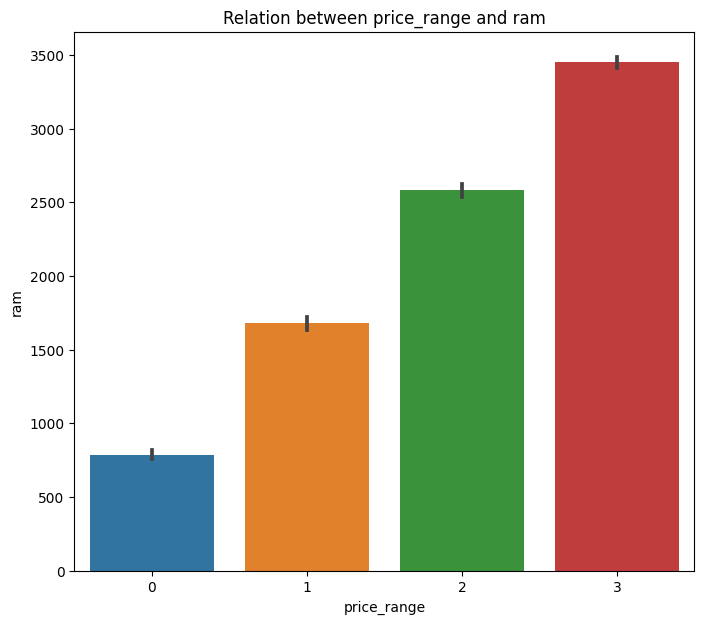

In [29]:
#visualizing relation between price_range and ram
plt.figure(figsize=(8,7))
sns.barplot(x= df['price_range'] ,y= df['ram'], data=df)
plt.xlabel('price_range')
plt.ylabel('ram')
plt.title('Relation between price_range and ram')
plt.show()

From the above visualization we can infer that as the price_range is increasing the ram also increasing.

###*Relation between price_range and 3G/4G*

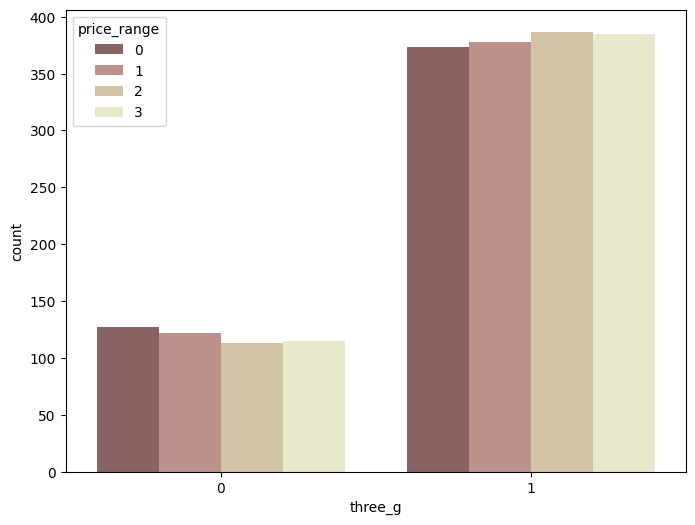

In [30]:
#visualizing three_g column
plt.figure(figsize= (8,6))
sns.countplot(x=df['three_g'], hue = df['price_range'],palette='pink')
plt.show()

  From the visualization we can infer that

* Low cost price_range mobiles are more that are not having three_g feature  
* High cost price_range mobiles are more that are having three_g feature

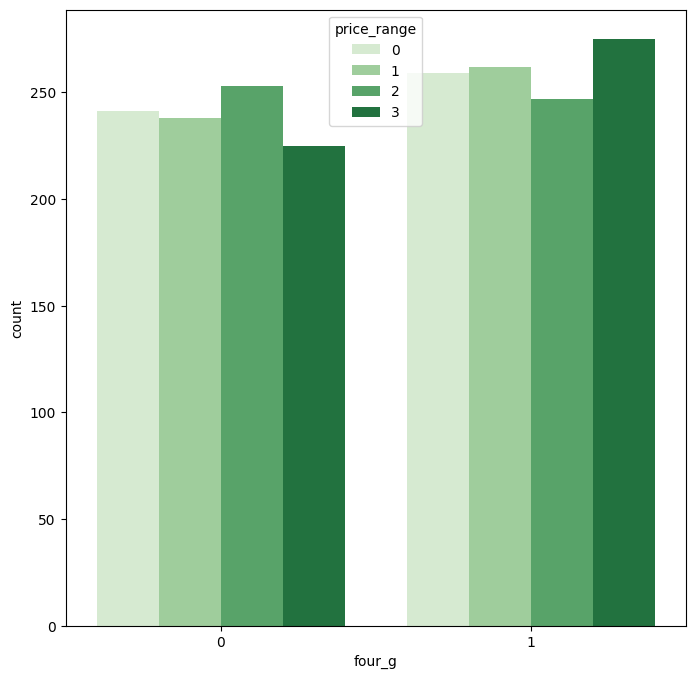

In [31]:
#visualizing four_g column
plt.figure(figsize= (8,8))
sns.countplot(x=df['four_g'], hue = df['price_range'],palette='Greens')
plt.show()

From the visualization we can infer that



*  High cost price_range mobiles are more that are not having three_g feature
*  Very High cost price_range mobiles are more that are having three_g feature

###*Relation between price_range , dual_sim and internal memory*

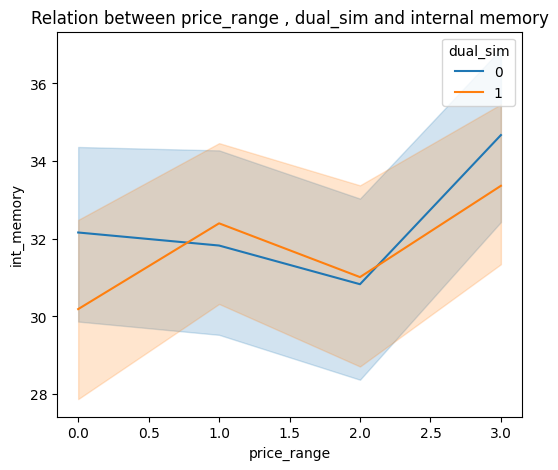

In [32]:
#Relation between price_range , dual_sim and internal memory
plt.figure(figsize=(6,5))
sns.lineplot(x=  'price_range',y = 'int_memory',hue='dual_sim', data=df)
plt.title('Relation between price_range , dual_sim and internal memory')
plt.show()

From the above visualization we can infer that:


*   Mobile of low cost supporting dual sim has less internal memory storage and mobile of very high cost supporting dual sim has more internal storage memory.
*   Mobile of high cost that not supporting dual sim has less internal memory storage and mobile of very high cost that not supporting dual sim has more internal storage memory than the mobile supporting dual sim

###*Relation between primary camera megapixel and front camera megapixel*

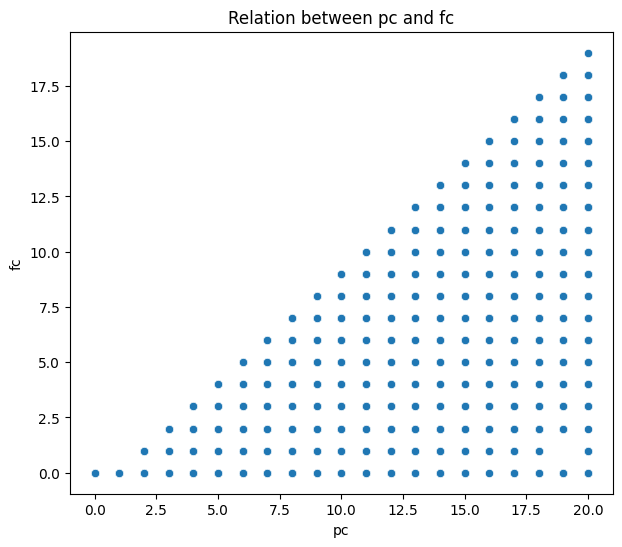

In [33]:
# Relation between pc and fc
plt.figure(figsize=(7,6))
sns.scatterplot(x = 'pc',y='fc',data =df)
plt.title('Relation between pc and fc')
plt.show()

From the above visualization we can infer that as primary megapixel increases the front camera megapixel also increases.

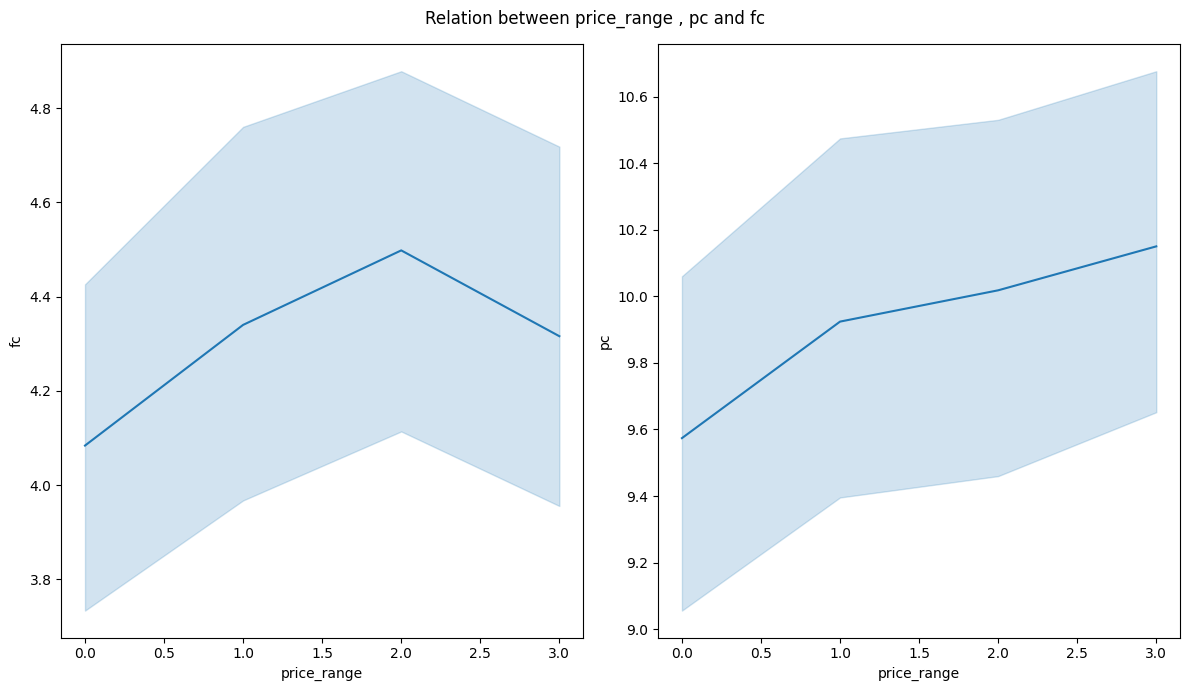

In [34]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
sns.lineplot(x = 'price_range',y='fc',data =df)

plt.subplot(1,2,2)
sns.lineplot(x = 'price_range',y='pc',data =df)
plt.suptitle('Relation between price_range , pc and fc')
plt.tight_layout()
plt.show()

From the above visualization we can infer that:


*   Mobile of high price range has the highest front camera megapixels.
*   Mobile of very high price range has the highest primary camera megapixels.
*   low price range mobile have both less pc and less fc

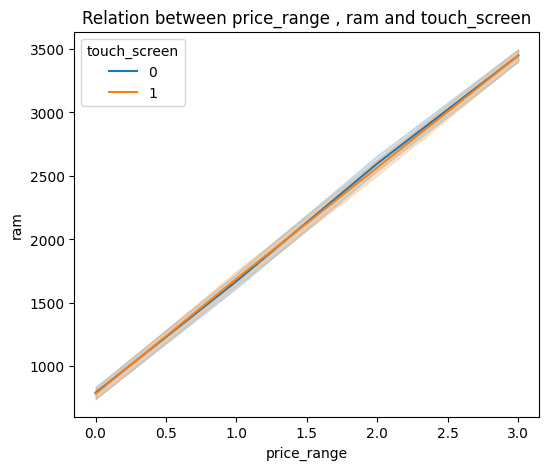

In [35]:
plt.figure(figsize=(6,5))
sns.lineplot(x=  'price_range',y = 'ram',hue='touch_screen', data=df)
plt.title('Relation between price_range , ram and touch_screen')
plt.show()

From the above visualization we can infer that as the price_range increases the ram also increases in case of both mobile having touch_screen or not.

##*Detecting outliers*

In [36]:
# Outliers
num_var = ['battery_power','clock_speed','fc', 'int_memory','m_dep', 'mobile_wt','n_cores', 'pc', 'px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

<ipython-input-37-d84179abcdad>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[i], color='red')


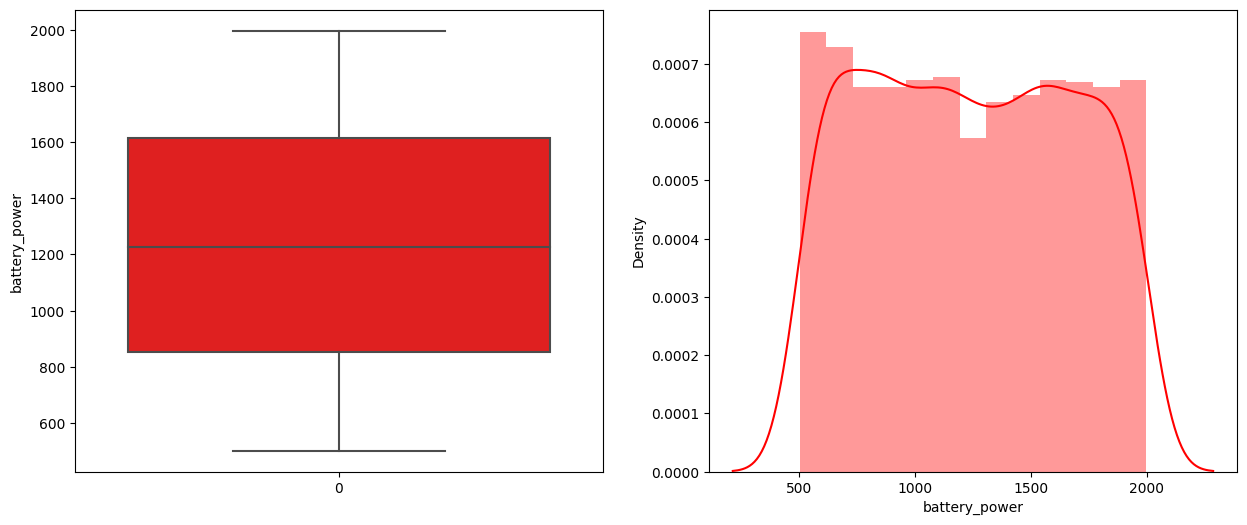

<ipython-input-37-d84179abcdad>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[i], color='red')


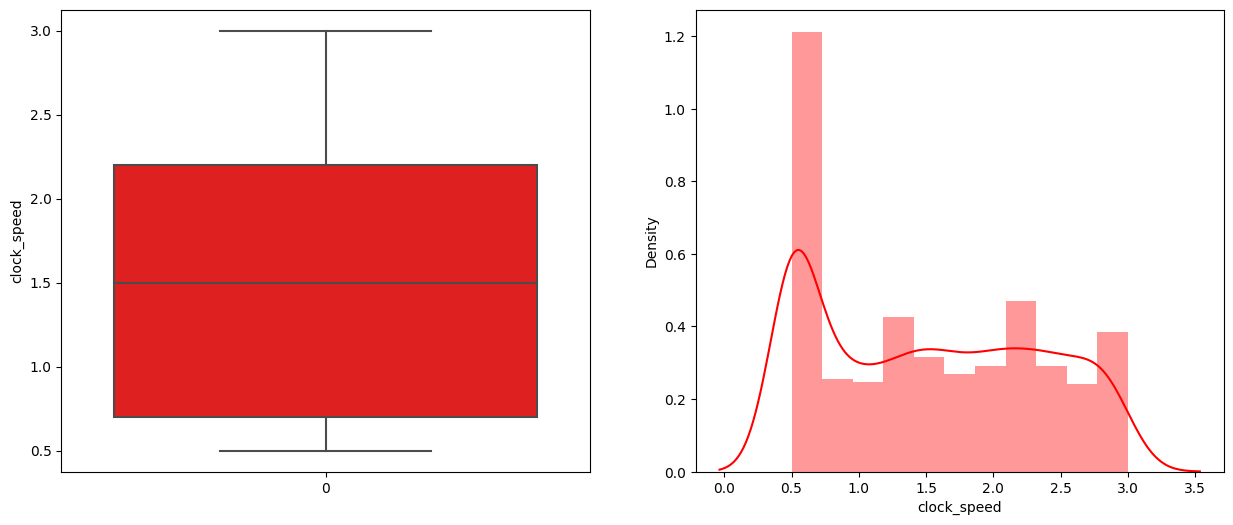

<ipython-input-37-d84179abcdad>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[i], color='red')


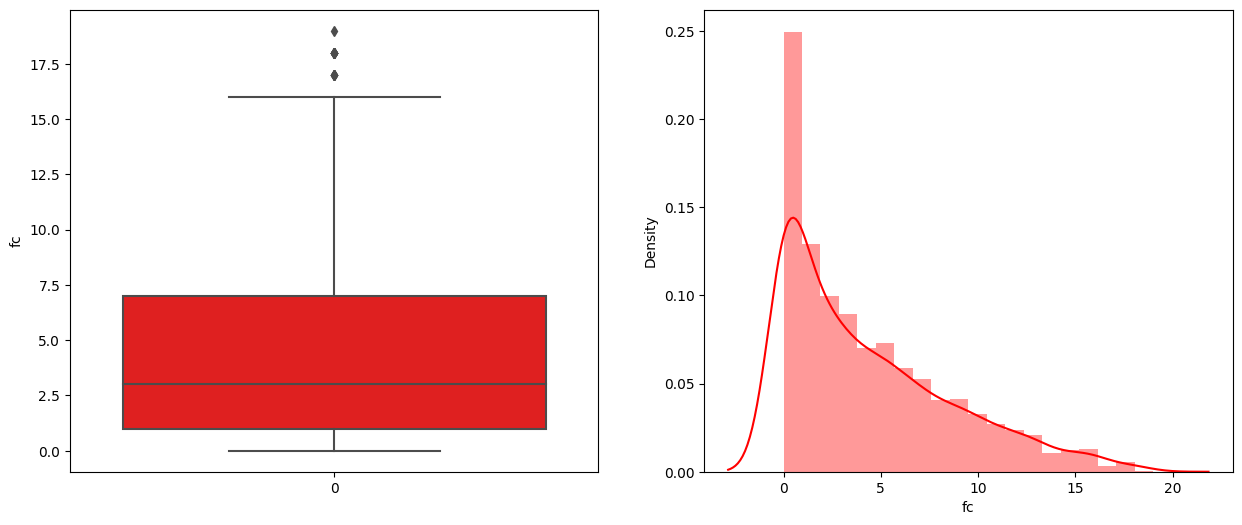

<ipython-input-37-d84179abcdad>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[i], color='red')


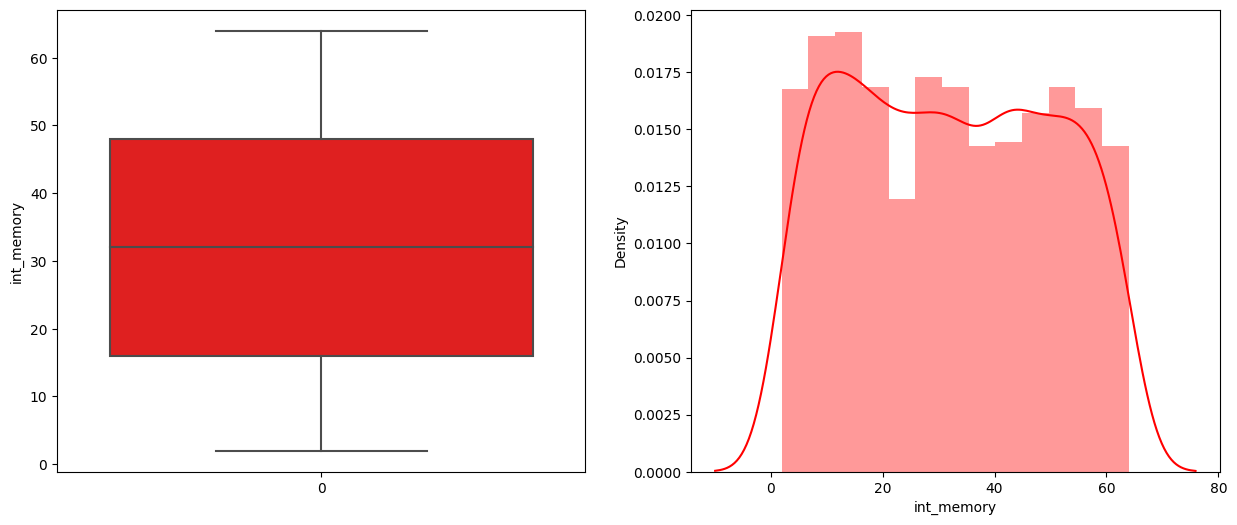

<ipython-input-37-d84179abcdad>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[i], color='red')


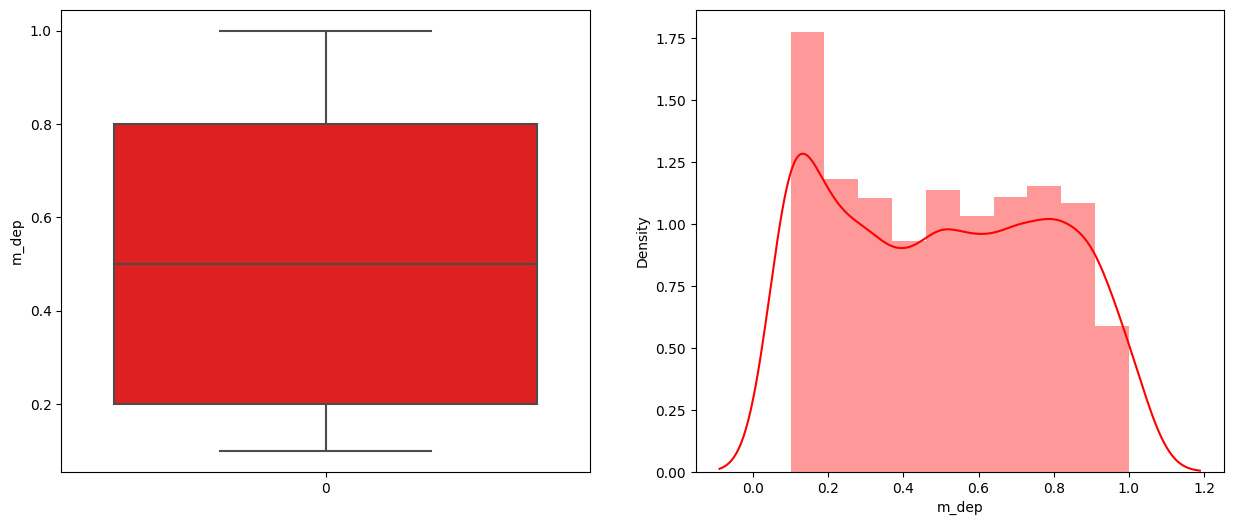

<ipython-input-37-d84179abcdad>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[i], color='red')


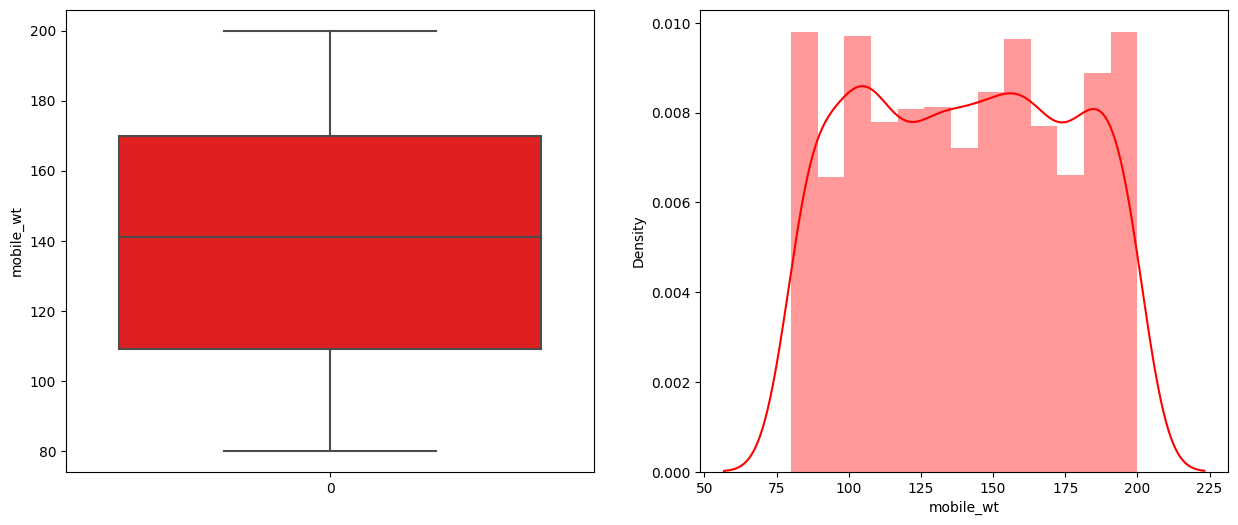

<ipython-input-37-d84179abcdad>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[i], color='red')


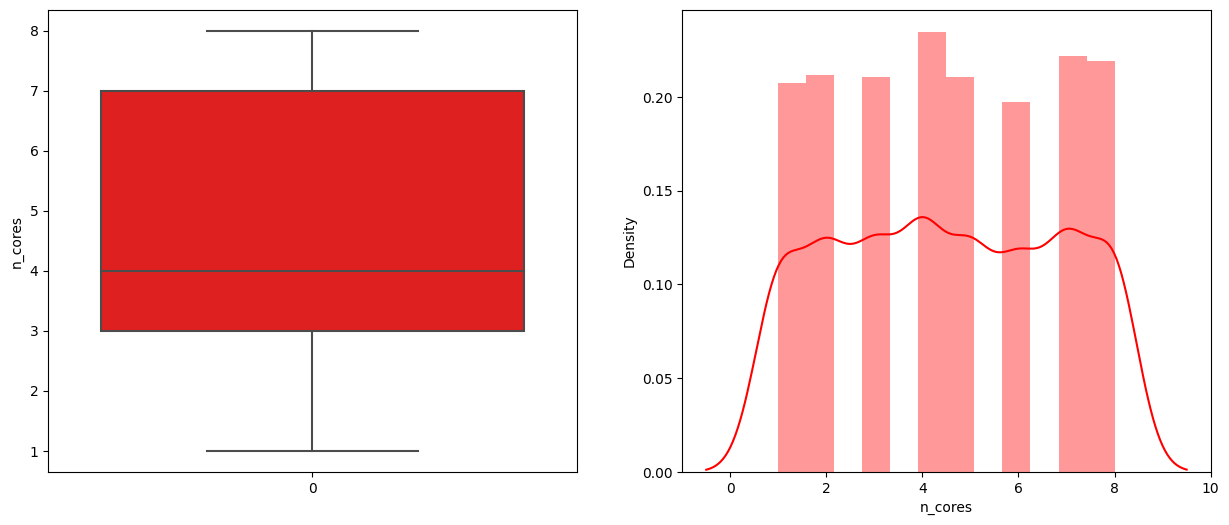

<ipython-input-37-d84179abcdad>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[i], color='red')


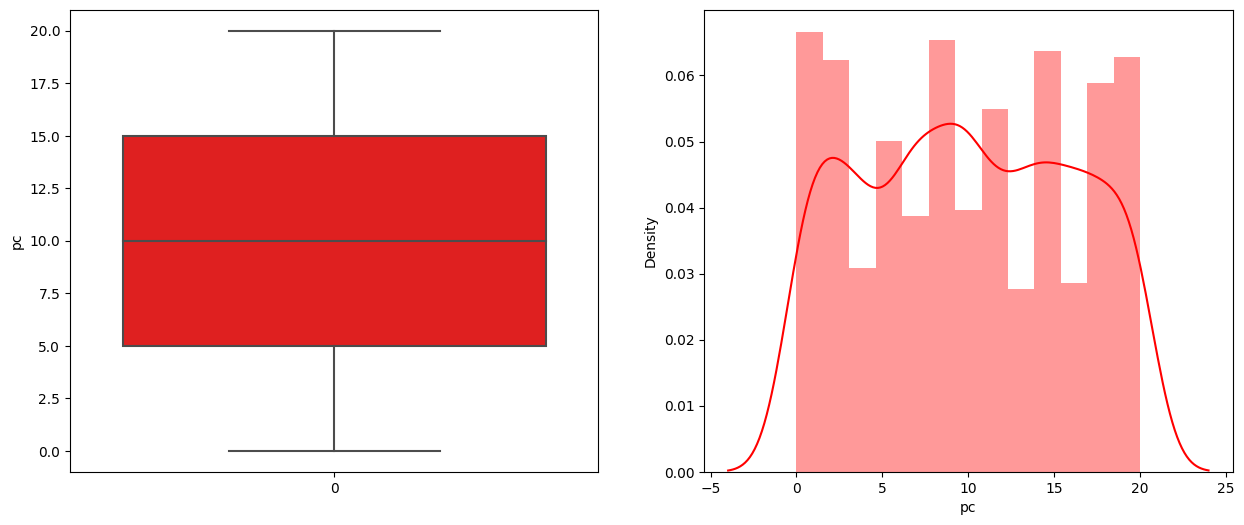

<ipython-input-37-d84179abcdad>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[i], color='red')


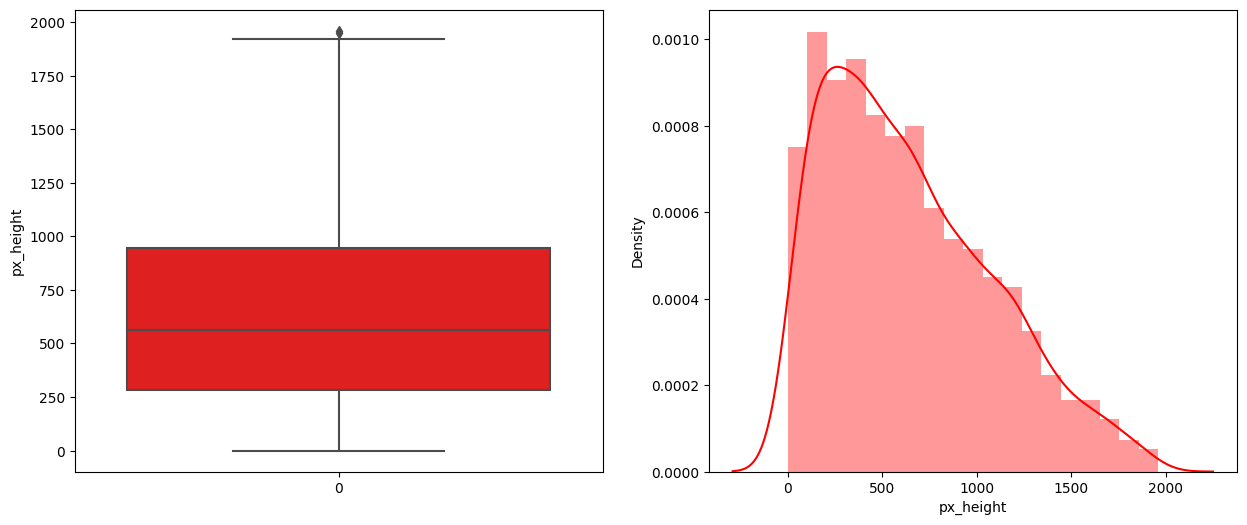

<ipython-input-37-d84179abcdad>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[i], color='red')


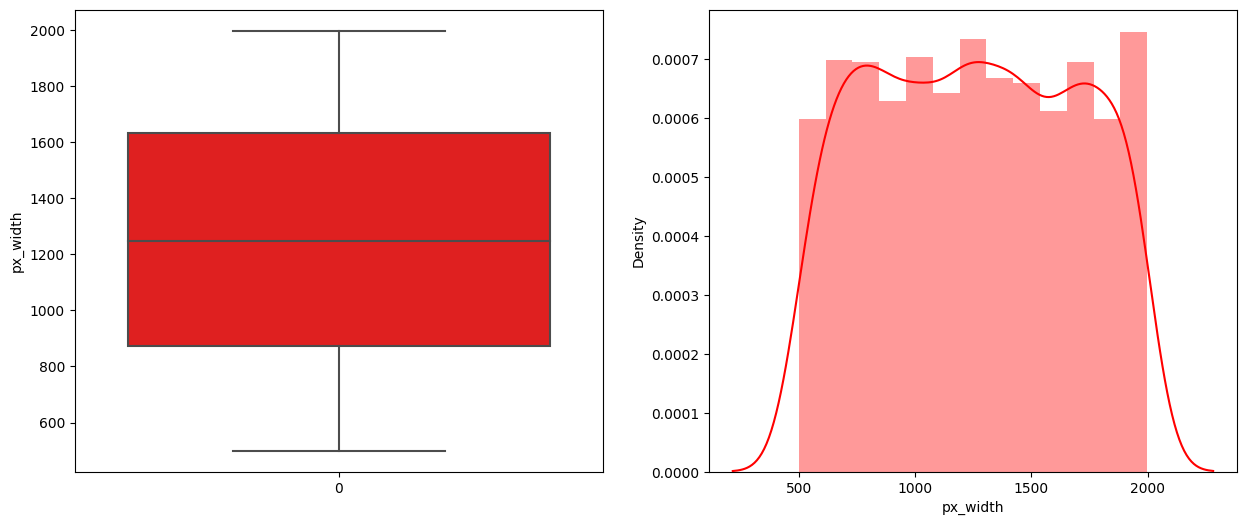

<ipython-input-37-d84179abcdad>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[i], color='red')


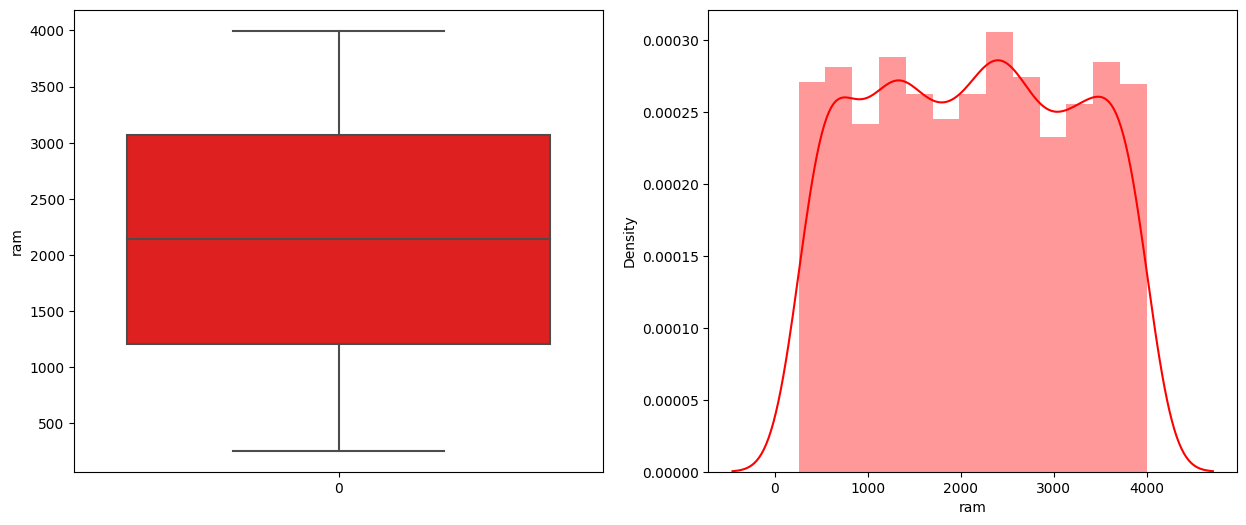

<ipython-input-37-d84179abcdad>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[i], color='red')


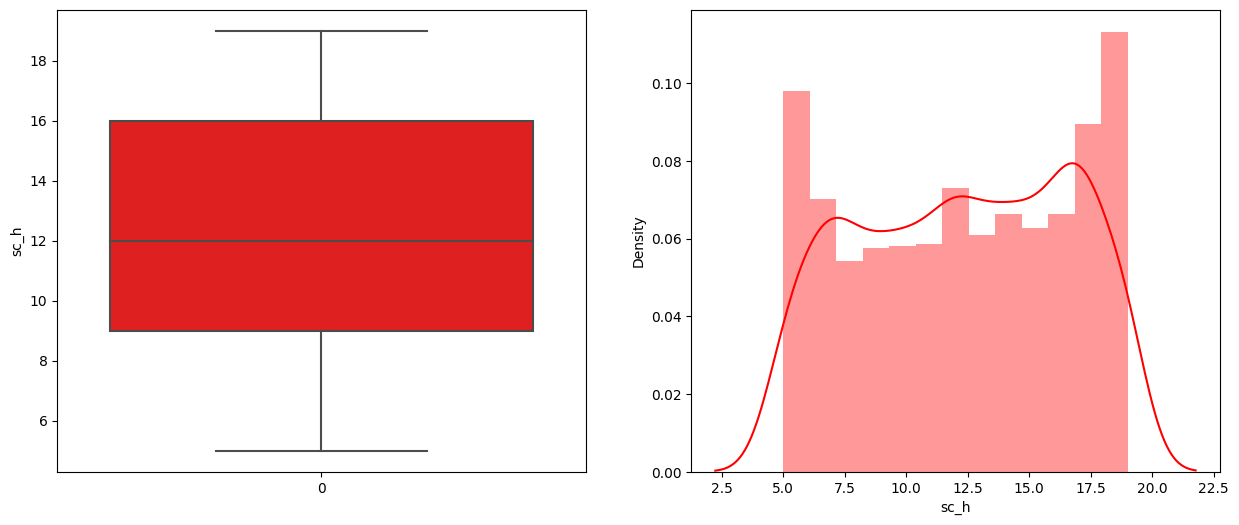

<ipython-input-37-d84179abcdad>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[i], color='red')


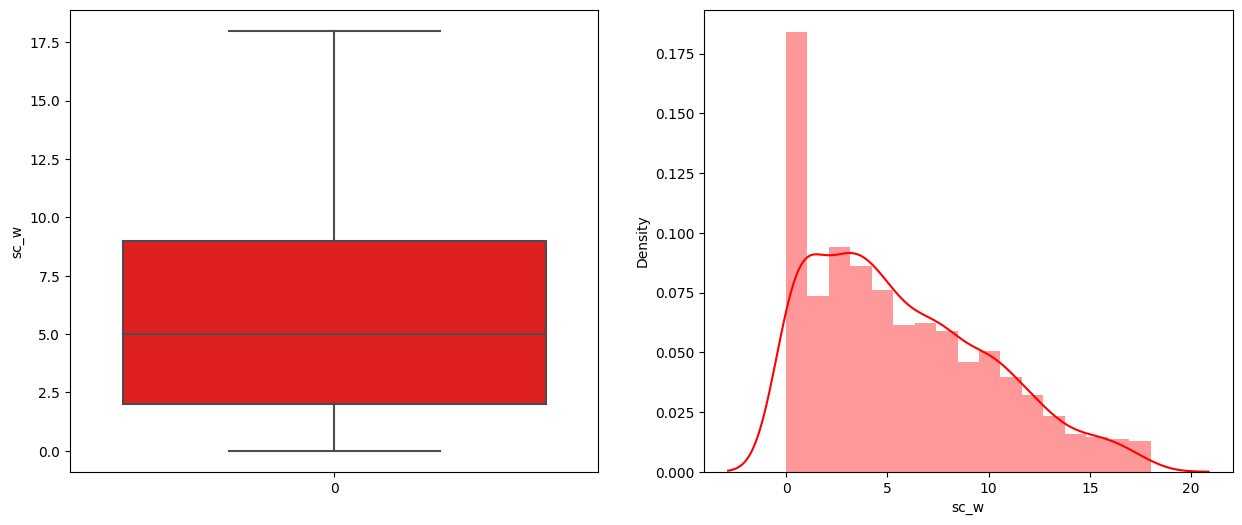

<ipython-input-37-d84179abcdad>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[i], color='red')


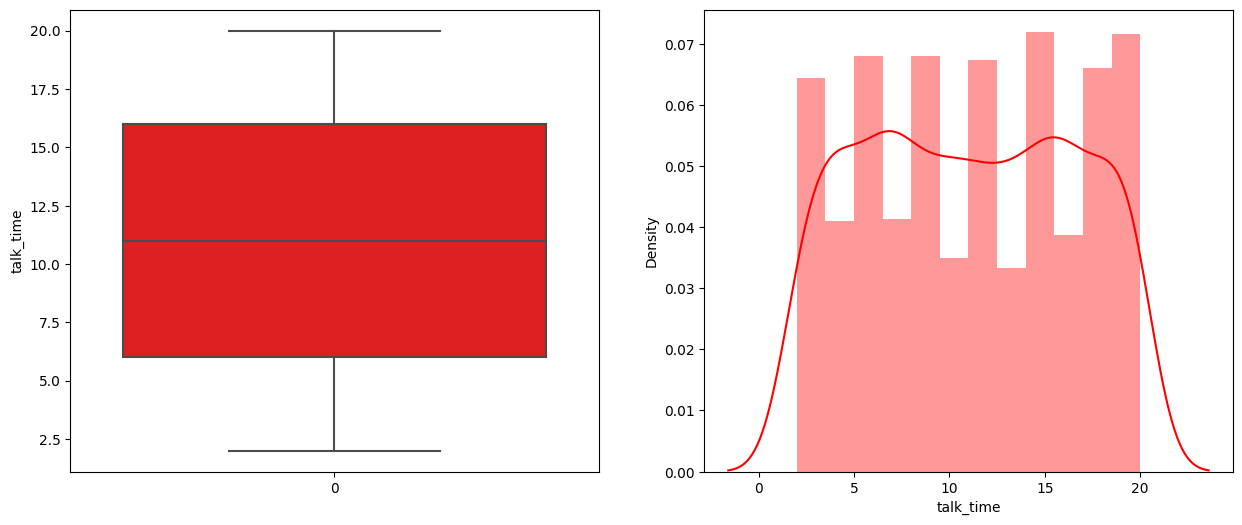

In [37]:
# plotting the boxplot and distribution
for i in num_var:
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  fig= sns.boxplot(df[i], color = 'red')
  fig.set_title('')
  fig.set_ylabel(i)


  plt.subplot(1,2,2)
  fig = sns.distplot(df[i], color='red')
  fig.set_xlabel(i)
  plt.show()

From the above visulaization we can see that px_height and fc has outlier and we need to fix it and the data is well distributed.

##*Treatment of outliers*

In [38]:
# treatment of outliers
Q1 = df['fc'].quantile(0.25)
Q3 = df['fc'].quantile(0.991)
IQR = Q3 -Q1
df = df[(df['fc'] <= Q3)]

In [39]:
Q1 = df['px_height'].quantile(0.25)
Q3 = df['px_height'].quantile(0.991)
IQR = Q3 -Q1
df = df[(df['px_height'] <= Q3)]

<ipython-input-40-23613aeb89bb>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig= sns.distplot(df[i], color = 'green')


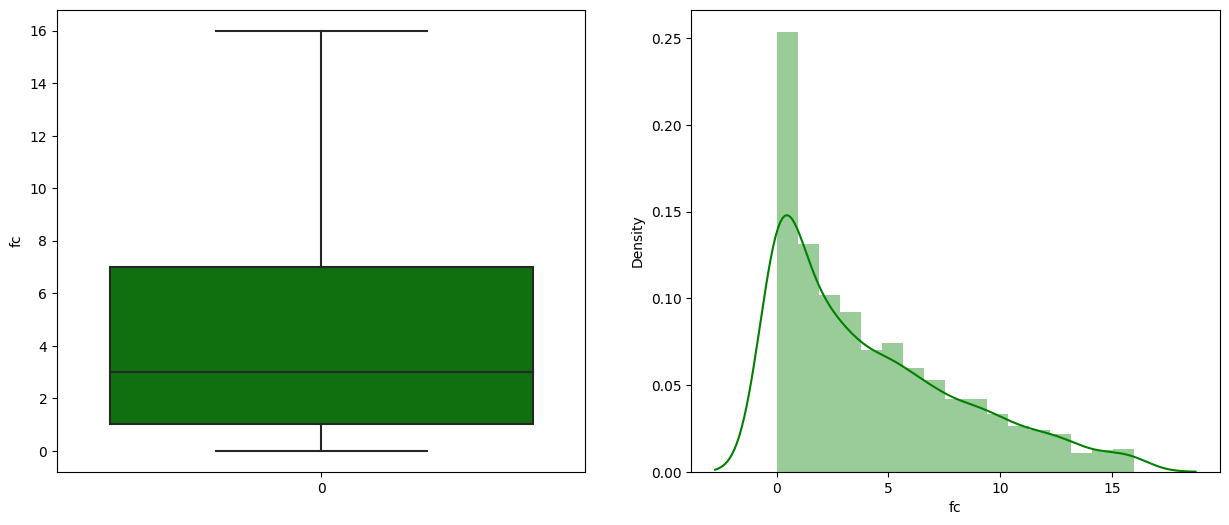

<ipython-input-40-23613aeb89bb>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig= sns.distplot(df[i], color = 'green')


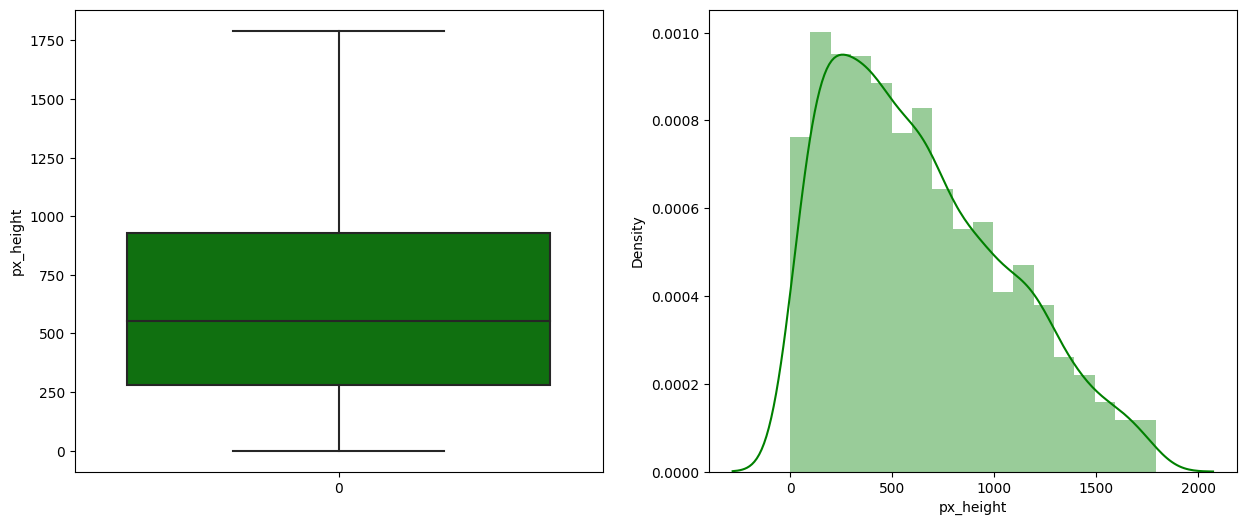

In [40]:
# visualizing whether utliers are removed or not
for i in ['fc','px_height']:
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  fig= sns.boxplot(df[i], color = 'green')
  fig.set_title('')
  fig.set_ylabel(i)


  plt.subplot(1,2,2)
  fig= sns.distplot(df[i], color = 'green')
  fig.set_xlabel(i)
  plt.show()


As we can see from above visualization that there no outlier after fixing it.

#*Data Preprocessing*

In [41]:
x= df.drop(['price_range'],axis = 1)
y= df['price_range']

In [42]:
# splitting into x_train , y_train, x_test, y_test
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [43]:
# standardizing the data points
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train_scaled = std.fit_transform(x_train)
x_test_scaled= std.transform(x_test)

#*ML Models*

###*Decision Tree Classifier*

In [44]:
# importing library
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state= 0)

In [45]:
# fitting/ training the train set
tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [46]:
# predicting the values
y_train_pred = tree.predict(x_train)
y_test_pred = tree.predict(x_test)

In [47]:
# checking the train set accuracy
accuracy_score(y_train_pred,y_train)

1.0

In [48]:
# checking the testset accuracy
accuracy_score(y_test_pred,y_test)

0.8575063613231552

In [49]:
# confusion matrix for the test set
cf_matrix= confusion_matrix(y_test,y_test_pred)
cf_matrix

array([[80, 11,  0,  0],
       [ 7, 82,  8,  0],
       [ 0, 12, 79, 10],
       [ 0,  0,  8, 96]])

In [50]:
# classification report for the train set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       403
           1       1.00      1.00      1.00       395
           2       1.00      1.00      1.00       390
           3       1.00      1.00      1.00       383

    accuracy                           1.00      1571
   macro avg       1.00      1.00      1.00      1571
weighted avg       1.00      1.00      1.00      1571



**let's tune some hyperparameters of Decision tree classifier**

In [51]:
tree = DecisionTreeClassifier(random_state = 0)

In [52]:
parameters = {'criterion':['gini','entropy'],'max_depth':[2,3,4,5,6,7,8,9,10,11,12,13,14,15],'splitter':['best','ramdom'],'min_samples_split':[3,5,10],'max_features':['auto','sqrt','log2',None]}

In [53]:
# fitting model with hyperparameter
from sklearn. model_selection import GridSearchCV
tree_tune = GridSearchCV(tree,parameters,cv=5,scoring = 'accuracy',verbose= 3)
tree_tune.fit(x_train,y_train)

Fitting 5 folds for each of 672 candidates, totalling 3360 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.438 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.462 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.433 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.449 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.392 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=ramdom;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=ramdom;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_split=3, splitter=best;, score=0.462 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_split=3, splitter=best;, score=0.433 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_split=3, splitter=best;, score=0.449 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_split=3, splitter=best;, score=0.392 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_split=3, splitter=ramdom;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_split=3, splitter=ramdom;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_split=3, splitter=ramdom;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_split=3, splitter=ramdom

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 5/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.497 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_split=10, splitter=ramdom;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_split=10, splitter=ramdom;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_split=10, splitter=ramdom;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_split=10, splitter=ramdom;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_split=10, splitter=ramdom;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_split=3, splitter=best;, score=0.530 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_split=3, splitter=

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.548 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.522 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_split=5, splitter=ramdom;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_split=5, splitter=ramdom;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_split=5, splitter=ramdom;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_split=5, splitter=ramdom;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_split=5, splitter=ramdom;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_split=10, splitter=best;

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.521 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.567 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.459 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.564 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.554 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=3, splitter=ramdom;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=3, splitter=ramdom;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=3, splitter=ramdom

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 1/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.546 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.678 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.685 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.500 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.557 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=10, splitter=ramdom;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=10, splitter=ramdom;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=10, splitte

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 2/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_split=10, splitter=best;, score=0.618 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_split=10, splitter=best;, score=0.640 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_split=10, splitter=best;, score=0.608 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_split=10, splitter=best;, score=0.650 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_split=10, splitter=ramdom;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_split=10, splitter=ramdom;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_split=10, splitter=ramdom;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_split=10, splitte

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 5/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.675 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_split=3, splitter=ramdom;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_split=3, splitter=ramdom;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_split=3, splitter=ramdom;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_split=3, splitter=ramdom;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_split=3, splitter=ramdom;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.629 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_split=5, splitter=best;,

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.546 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.602 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.697 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.662 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.605 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=10, splitter=ramdom;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=10, splitter=ramdom;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=10, splitte

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=5, splitter=best;, score=0.621 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=5, splitter=ramdom;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=5, splitter=ramdom;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=5, splitter=ramdom;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=5, splitter=ramdom;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=5, splitter=ramdom;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=10, splitter=best;, score=0.686 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=10, split

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 4/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_split=10, splitter=best;, score=0.589 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_split=10, splitter=best;, score=0.659 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_split=10, splitter=ramdom;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_split=10, splitter=ramdom;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_split=10, splitter=ramdom;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_split=10, splitter=ramdom;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_split=10, splitter=ramdom;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_split=3, 

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 3/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.605 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.615 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.561 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_split=3, splitter=ramdom;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_split=3, splitter=ramdom;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_split=3, splitter=ramdom;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_split=3, splitter=ramdom;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_split=3, splitte

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 4/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.669 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.678 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_split=5, splitter=ramdom;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_split=5, splitter=ramdom;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_split=5, splitter=ramdom;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_split=5, splitter=ramdom;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_split=5, splitter=ramdom;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_split=10, splitt

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 1/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.667 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.701 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.615 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.678 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.691 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_split=5, splitter=ramdom;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_split=5, splitter=ramdom;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_split=5, splitte

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 1/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.587 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.678 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.742 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.662 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.580 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=3, splitter=ramdom;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=3, splitter=ramdom;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=3, splitte

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_split=10, splitter=best;, score=0.462 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_split=10, splitter=best;, score=0.455 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_split=10, splitter=best;, score=0.481 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_split=10, splitter=best;, score=0.395 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_split=10, splitter=ramdom;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_split=10, splitter=ramdom;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_split=10, splitter=ramdom;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 3/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.557 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.554 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.506 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_split=5, splitter=ramdom;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_split=5, splitter=ramdom;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_split=5, splitter=ramdom;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_split=5, splitter=ramdom;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 4/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_split=3, splitter=best;, score=0.650 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_split=3, splitter=best;, score=0.634 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_split=3, splitter=ramdom;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_split=3, splitter=ramdom;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_split=3, splitter=ramdom;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_split=3, splitter=ramdom;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_split=3, splitter=ramdom;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 1/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_split=10, splitter=best;, score=0.432 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_split=10, splitter=best;, score=0.481 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_split=10, splitter=best;, score=0.570 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_split=10, splitter=best;, score=0.500 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_split=10, splitter=best;, score=0.506 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_split=10, splitter=ramdom;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_split=10, splitter=ramdom;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=auto, min_s

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 3/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.685 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.685 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.580 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=5, splitter=ramdom;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=5, splitter=ramdom;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=5, splitter=ramdom;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=5, splitter=ramdom;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 4/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_split=3, splitter=ramdom;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_split=3, splitter=ramdom;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_split=5, splitter=best;, score=0.686 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_split=5, splitter=best;, score=0.745 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_split=5, splitter=best;, score=0.662 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_split=5, splitter=best;, score=0.669 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_split=5, splitter=best;, score=0.589 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 2/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_split=5, splitter=ramdom;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_split=5, splitter=ramdom;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_split=5, splitter=ramdom;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_split=5, splitter=ramdom;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_split=10, splitter=best;, score=0.508 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_split=10, splitter=best;, score=0.691 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_split=10, splitter=best;, score=0.720 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=auto, min_sampl

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 4/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_split=10, splitter=best;, score=0.707 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_split=10, splitter=best;, score=0.701 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_split=10, splitter=ramdom;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_split=10, splitter=ramdom;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_split=10, splitter=ramdom;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_split=10, splitter=ramdom;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_split=10, splitter=ramdom;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_s

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 2/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.557 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.697 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.653 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.669 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=3, splitter=ramdom;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=3, splitter=ramdom;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=3, splitter=ramdom;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 5/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.662 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_split=3, splitter=ramdom;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_split=3, splitter=ramdom;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_split=3, splitter=ramdom;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_split=3, splitter=ramdom;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_split=3, splitter=ramdom;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.629 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 1/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_split=3, splitter=ramdom;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_split=3, splitter=ramdom;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_split=3, splitter=ramdom;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_split=3, splitter=ramdom;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_split=3, splitter=ramdom;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.571 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.611 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 2/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.707 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.682 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.615 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.646 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_split=5, splitter=ramdom;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_split=5, splitter=ramdom;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_split=5, splitter=ramdom;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 3/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.672 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.564 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.688 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_split=5, splitter=ramdom;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_split=5, splitter=ramdom;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_split=5, splitter=ramdom;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_split=5, splitter=ramdom;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 2/5] END criterion=entropy, max_depth=15, max_features=auto, min_samples_split=3, splitter=best;, score=0.726 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=auto, min_samples_split=3, splitter=best;, score=0.650 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=auto, min_samples_split=3, splitter=best;, score=0.685 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=auto, min_samples_split=3, splitter=best;, score=0.739 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, max_features=auto, min_samples_split=3, splitter=ramdom;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=auto, min_samples_split=3, splitter=ramdom;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=auto, min_samples_split=3, splitter=ramdom;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=auto, min_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1680 fits failed out of a total of 3360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1680 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _v

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_split': [3, 5, 10],
                         'splitter': ['best', 'ramdom']},
             scoring='accuracy', verbose=3)

In [54]:
print(tree_tune.best_params_)

{'criterion': 'entropy', 'max_depth': 7, 'max_features': None, 'min_samples_split': 5, 'splitter': 'best'}


In [55]:
# using best parameter trainning the the data
tree_best_p = DecisionTreeClassifier(criterion= 'entropy', max_depth= 7,  min_samples_split= 5, random_state = 0)
tree_best_p.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=5,
                       random_state=0)

In [56]:
#predicting y values on test and train data.
y_train_pred = tree_best_p.predict(x_train)
y_test_pred = tree_best_p.predict(x_test)

In [57]:
# checking the train set accuracy
accuracy_score(y_train_pred,y_train)

0.9503500954805856

In [58]:
# checking the test set accuracy
accuracy_score(y_test_pred,y_test)

0.8396946564885496

In [59]:
# confusion matrix for the test set
cf_matrix= confusion_matrix(y_test,y_test_pred)
cf_matrix

array([[76, 15,  0,  0],
       [ 6, 85,  6,  0],
       [ 0, 14, 80,  7],
       [ 0,  0, 15, 89]])

In [60]:
# classification report for the train set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       403
           1       0.93      0.97      0.95       395
           2       0.91      0.93      0.92       390
           3       0.99      0.92      0.95       383

    accuracy                           0.95      1571
   macro avg       0.95      0.95      0.95      1571
weighted avg       0.95      0.95      0.95      1571



In [93]:
#feature importance
def plot_feature_importance(algo, feature_names):
    importances = algo.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title("Feature Importances")
    plt.bar(range(x.shape[1]), importances[indices], align="center")
    plt.xticks(range(x.shape[1]), [feature_names[i] for i in indices], rotation=45)
    plt.xlim([-1, x.shape[1]])
    plt.tight_layout()
    plt.show()

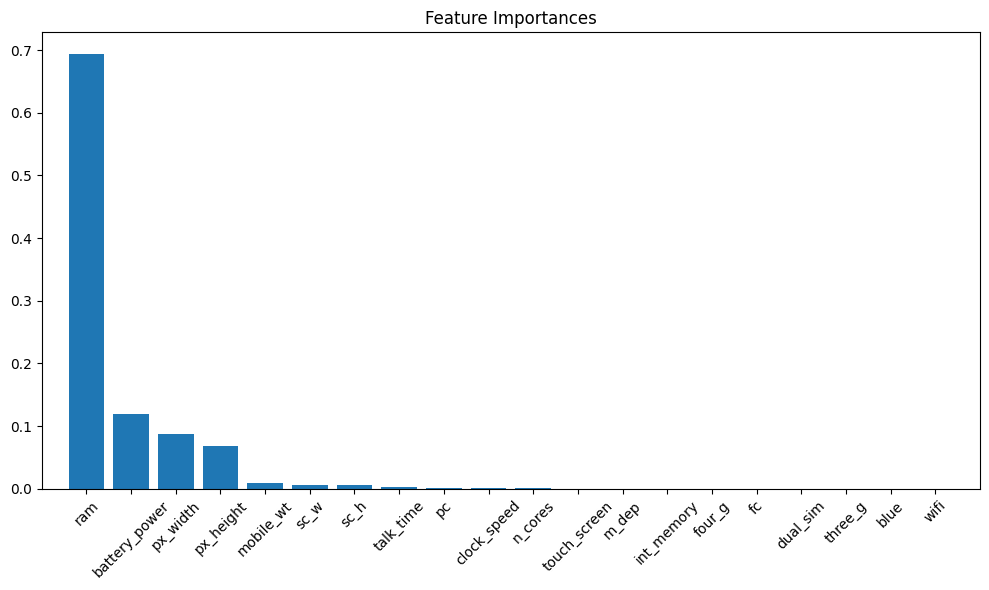

In [94]:
# Call the function to plot feature importance
plot_feature_importance(tree_best_p, x.columns)

**Observation of Decision Tree Classifier**

before tunning



*  Trainning accuracy= 100%
*   test accuracy = 85%

The model is overfitted the training data and does not generalised so we tuned.

After tunning


*  Trainning accuracy= 95%
*  test accuracy = 83%

In general, achieving 100% training accuracy is often a sign of overfitting. The goal of hyperparameter tuning is to strike a balance between training accuracy and test accuracy by finding the optimal set of hyperparameters that prevent overfitting and lead to better generalization. While the test accuracy decreased slightly, the decrease in training accuracy suggests that the tuning process is helping the model to better generalize, which is a step in the right direction.

###*Random forest classifier*

In [74]:
#creating object of the classifier
rfc = RandomForestClassifier(random_state = 0)

In [75]:
#fitting /training the model
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [76]:
#predicying y values on train and test set
y_train_pred =rfc.predict(x_train)
y_test_pred = rfc.predict(x_test)

In [77]:
# checking the accuracy score of train set
accuracy_score(y_train, y_train_pred)

1.0

In [78]:
# checking the accuracy score of test set
accuracy_score(y_test, y_test_pred)

0.8702290076335878

In [79]:
# confusion matrix for test set
cf_matrix= confusion_matrix(y_test,y_test_pred)
cf_matrix

array([[79, 12,  0,  0],
       [ 6, 81, 10,  0],
       [ 0, 10, 83,  8],
       [ 0,  0,  5, 99]])

In [80]:
 #classification report for the train set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       403
           1       1.00      1.00      1.00       395
           2       1.00      1.00      1.00       390
           3       1.00      1.00      1.00       383

    accuracy                           1.00      1571
   macro avg       1.00      1.00      1.00      1571
weighted avg       1.00      1.00      1.00      1571



**let's tune some hyperparameters of Random forest classifier**

In [81]:
parameters = {'n_estimators':[100,200,300],'max_depth': [10,20,40],'min_samples_split':[2,6,10],'max_leaf_nodes':[5, 10, 20, 50],'criterion':['entropy','gini'],'max_features':['log2','sqrt']}

In [82]:
rfc = RandomForestClassifier(random_state=0)

In [95]:
# applying GridSearchCV
rfc_tune =  GridSearchCV(rfc,parameters, cv=5, scoring='accuracy',verbose=3)
rfc_tune.fit(x_train,y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV 1/5] END criterion=entropy, max_depth=10, max_features=log2, max_leaf_nodes=5, min_samples_split=2, n_estimators=100;, score=0.781 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=log2, max_leaf_nodes=5, min_samples_split=2, n_estimators=100;, score=0.793 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=log2, max_leaf_nodes=5, min_samples_split=2, n_estimators=100;, score=0.806 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=log2, max_leaf_nodes=5, min_samples_split=2, n_estimators=100;, score=0.774 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=log2, max_leaf_nodes=5, min_samples_split=2, n_estimators=100;, score=0.768 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=log2, max_leaf_nodes=5, min_samples_split=2, n_estimators=200;, score=0.778 total time=   0.4s
[CV 2/5] END

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 20, 40],
                         'max_features': ['log2', 'sqrt'],
                         'max_leaf_nodes': [5, 10, 20, 50],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=3)

In [96]:
print(rfc_tune.best_params_)

{'criterion': 'entropy', 'max_depth': 20, 'max_features': 'log2', 'max_leaf_nodes': 50, 'min_samples_split': 6, 'n_estimators': 300}


In [97]:
# fitting the model with best parameters
rfc_best_p = RandomForestClassifier(criterion= 'entropy', max_depth= 20, max_features= 'log2', max_leaf_nodes= 50, min_samples_split= 6, n_estimators= 300)
rfc_best_p .fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, max_features='log2',
                       max_leaf_nodes=50, min_samples_split=6,
                       n_estimators=300)

In [98]:
#predicying y values on train and test set
y_train_pred =rfc_best_p.predict(x_train)
y_test_pred = rfc_best_p.predict(x_test)

In [99]:
# checking the accuracy score of train set
accuracy_score(y_train, y_train_pred)

0.9694462126034373

In [100]:
# checking the accuracy score of train set
accuracy_score(y_test, y_test_pred)

0.8524173027989822

In [101]:
# confusion matrix for test set
cf_matrix= confusion_matrix(y_test,y_test_pred)
cf_matrix

array([[85,  6,  0,  0],
       [ 9, 72, 16,  0],
       [ 0, 15, 79,  7],
       [ 0,  0,  5, 99]])

In [102]:
 #classification report for the train set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       403
           1       0.94      0.95      0.94       395
           2       0.97      0.93      0.95       390
           3       0.99      1.00      0.99       383

    accuracy                           0.97      1571
   macro avg       0.97      0.97      0.97      1571
weighted avg       0.97      0.97      0.97      1571



In [106]:
#feature importance
def plot_feature_importance(algo, feature_names):
    importances = algo.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title("Feature Importances")
    plt.bar(range(x.shape[1]), importances[indices], align="center")
    plt.xticks(range(x.shape[1]), [feature_names[i] for i in indices], rotation=45)
    plt.xlim([-1, x.shape[1]])
    plt.tight_layout()
    plt.show()

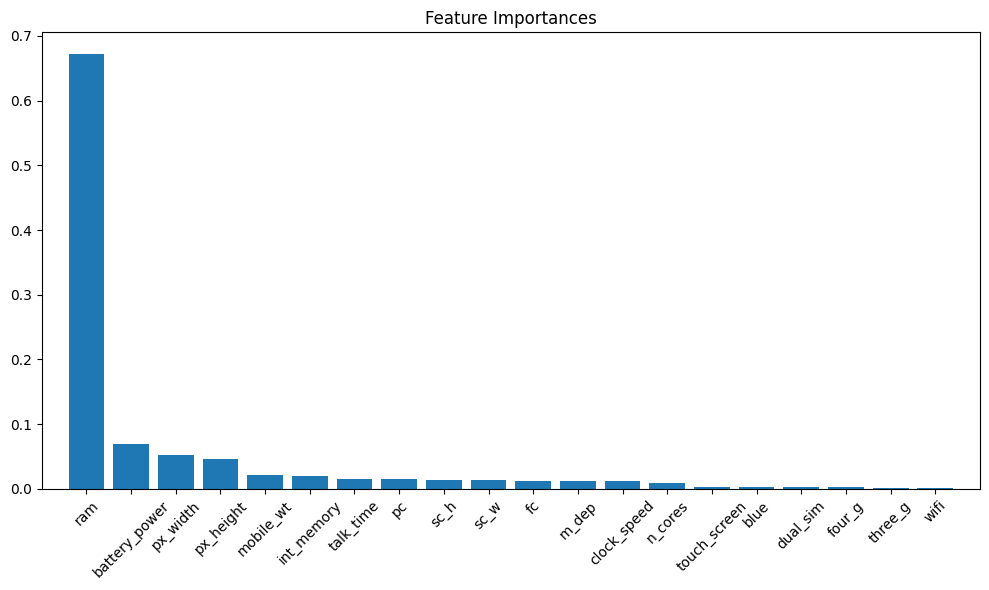

In [108]:
# Call the function to plot feature importance
plot_feature_importance(rfc_best_p, x.columns)

**Observation of Random forest**

before tuning



*  Training accuracy= 100%
*   test accuracy = 87%

The model is overfitted the training data and does not generalised so we tuned.

After tuning


*  Training accuracy= 96%
*  test accuracy = 85%

 The drop in training accuracy and the modest improvement in test accuracy after tuning indicate that the model is likely to perform better on unseen data and that the tuning process is helping to address overfitting.





###*Gradient Boosting Classifier*

In [109]:
# creating object of the classifier
gbc = GradientBoostingClassifier(random_state = 0)
gbc.fit(x_train,y_train)

GradientBoostingClassifier(random_state=0)

In [110]:
#predicting values of y train and test set
y_train_pred =gbc.predict(x_train)
y_test_pred =gbc.predict(x_test)


In [111]:
# checking the accuracy score of the train set
accuracy_score(y_train,y_train_pred)

1.0

In [112]:
# checking the accuracy score of the test set
accuracy_score(y_test,y_test_pred)

0.9007633587786259

In [113]:
# confusion matrix for test set
cf_matrix= confusion_matrix(y_test,y_test_pred)
cf_matrix

array([[82,  9,  0,  0],
       [ 5, 85,  7,  0],
       [ 0,  8, 88,  5],
       [ 0,  0,  5, 99]])

In [114]:
 #classification report for the train set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       403
           1       1.00      1.00      1.00       395
           2       1.00      1.00      1.00       390
           3       1.00      1.00      1.00       383

    accuracy                           1.00      1571
   macro avg       1.00      1.00      1.00      1571
weighted avg       1.00      1.00      1.00      1571



**let's tune some hyperparameters of Gradient Boosting classifier**

In [115]:
parameters = {'learning_rate':[0.005,1,2,3],'min_samples_split':range(10,26)}

In [116]:
# let's apply GridSearchCV
gbc_tune = GridSearchCV(gbc,parameters, cv= 5,scoring='accuracy',verbose=1)
gbc_tune.fit(x_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.005, 1, 2, 3],
                         'min_samples_split': range(10, 26)},
             scoring='accuracy', verbose=1)

In [117]:
gbc_tune.best_params_

{'learning_rate': 1, 'min_samples_split': 17}

In [118]:
# fitting with the best parameters
gbc_best_p = GradientBoostingClassifier(learning_rate= 1, min_samples_split= 17,random_state=0)
gbc_best_p.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=1, min_samples_split=17,
                           random_state=0)

In [119]:
#predicting values of y train and test set
y_train_pred =gbc_best_p.predict(x_train)
y_test_pred =gbc_best_p.predict(x_test)

In [120]:
# checking the accuracy score of the train set
accuracy_score(y_train,y_train_pred)

1.0

In [121]:
# checking the accuracy score of the test set
accuracy_score(y_test,y_test_pred)

0.9287531806615776

In [122]:
# confusion matrix for test set
cf_matrix= confusion_matrix(y_test,y_test_pred)
cf_matrix

array([[ 82,   9,   0,   0],
       [  3,  89,   5,   0],
       [  0,   6,  94,   1],
       [  0,   0,   4, 100]])

In [123]:
#classification report for the train set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       403
           1       1.00      1.00      1.00       395
           2       1.00      1.00      1.00       390
           3       1.00      1.00      1.00       383

    accuracy                           1.00      1571
   macro avg       1.00      1.00      1.00      1571
weighted avg       1.00      1.00      1.00      1571



In [124]:
#feature importance
def plot_feature_importance(algo, feature_names):
    importances = algo.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title("Feature Importances")
    plt.bar(range(x.shape[1]), importances[indices], align="center")
    plt.xticks(range(x.shape[1]), [feature_names[i] for i in indices], rotation=45)
    plt.xlim([-1, x.shape[1]])
    plt.tight_layout()
    plt.show()

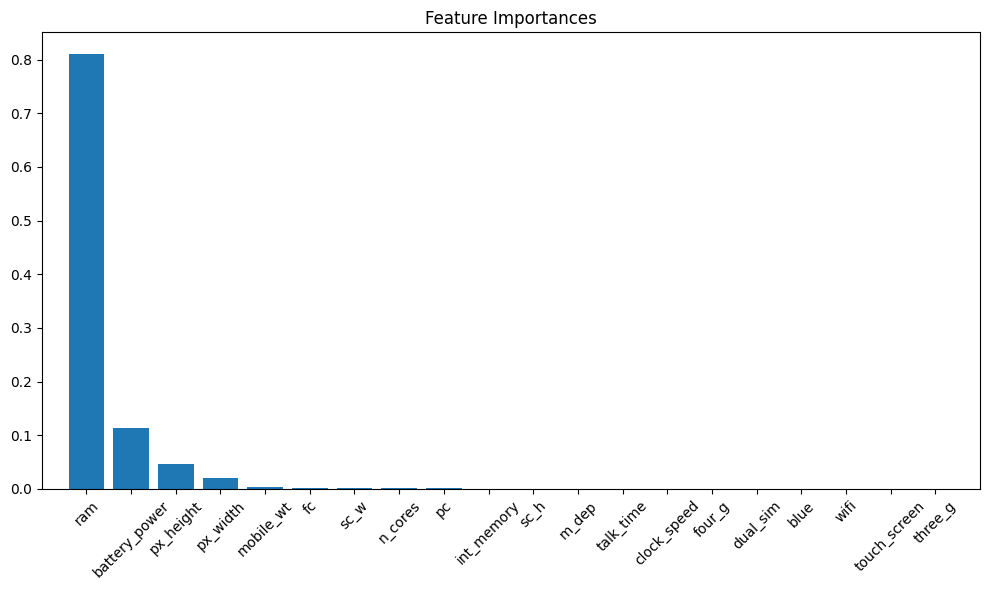

In [125]:
# Call the function to plot feature importance
plot_feature_importance(gbc_best_p, x.columns)

**Observation of the Gradient Boosting Classifier**

Before tunning:

*  Trainning accuracy= 100%
*   test accuracy = 90%

The model is overfitted the training data and does not generalised so we tuned.

After tunning


*  Trainning accuracy= 100%
*  test accuracy = 92%

we have slightly improved the model performance but the model is not best.

###*K Nearest Neighbors*

In [126]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [127]:
#predicting values of y train and test set
y_train_pred =knn.predict(x_train)
y_test_pred =knn.predict(x_test)

In [128]:
# checking the accuracy score of the train set
accuracy_score(y_train,y_train_pred)

0.9567154678548695

In [129]:
# checking the accuracy score of the test set
accuracy_score(y_test,y_test_pred)

0.9185750636132316

In [130]:
# confusion matrix for test set
cf_matrix= confusion_matrix(y_test,y_test_pred)
cf_matrix

array([[85,  6,  0,  0],
       [ 4, 89,  4,  0],
       [ 0,  3, 92,  6],
       [ 0,  0,  9, 95]])

In [131]:
#classification report for the train set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       403
           1       0.94      0.96      0.95       395
           2       0.94      0.93      0.93       390
           3       0.97      0.96      0.96       383

    accuracy                           0.96      1571
   macro avg       0.96      0.96      0.96      1571
weighted avg       0.96      0.96      0.96      1571



**let's tune some hyperparameters of K Nearest Neighbors**

In [132]:
parameters ={'n_neighbors':list(range(1,31))}

In [133]:
# let's apply GridSearchCV
knn_tune = GridSearchCV(knn,parameters, cv= 5,scoring='accuracy',verbose=3)
knn_tune.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.883 total time=   0.0s
[CV 2/5] END .....................n_neighbors=1;, score=0.889 total time=   0.0s
[CV 3/5] END .....................n_neighbors=1;, score=0.917 total time=   0.0s
[CV 4/5] END .....................n_neighbors=1;, score=0.908 total time=   0.0s
[CV 5/5] END .....................n_neighbors=1;, score=0.901 total time=   0.0s
[CV 1/5] END .....................n_neighbors=2;, score=0.892 total time=   0.0s
[CV 2/5] END .....................n_neighbors=2;, score=0.904 total time=   0.0s
[CV 3/5] END .....................n_neighbors=2;, score=0.895 total time=   0.0s
[CV 4/5] END .....................n_neighbors=2;, score=0.927 total time=   0.0s
[CV 5/5] END .....................n_neighbors=2;, score=0.873 total time=   0.0s
[CV 1/5] END .....................n_neighbors=3;, score=0.914 total time=   0.0s
[CV 2/5] END .....................n_neighbors=3

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy', verbose=3)

In [134]:
knn_tune.best_params_

{'n_neighbors': 7}

In [135]:
# fitting model with the best parameters
knn_best_p = KNeighborsClassifier(n_neighbors= 7)
knn_best_p.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [136]:
#predicting values of y train and test set
y_train_pred =knn_best_p.predict(x_train)
y_test_pred =knn_best_p.predict(x_test)

In [137]:
# checking the accuracy score of the train set
accuracy_score(y_train,y_train_pred)

0.9458943348185869

In [138]:
# checking the accuracy score of the test set
accuracy_score(y_test,y_test_pred)

0.926208651399491

In [139]:
# confusion matrix for test set
cf_matrix= confusion_matrix(y_test,y_test_pred)
cf_matrix

array([[86,  5,  0,  0],
       [ 5, 89,  3,  0],
       [ 0,  3, 92,  6],
       [ 0,  0,  7, 97]])

In [140]:
#classification report for the train set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       403
           1       0.93      0.95      0.94       395
           2       0.91      0.92      0.91       390
           3       0.96      0.93      0.95       383

    accuracy                           0.95      1571
   macro avg       0.95      0.95      0.95      1571
weighted avg       0.95      0.95      0.95      1571



**Observation of the K Nearest Neighbors**

Before tuning:

*  Training accuracy= 95%
*   test accuracy = 91%

The model is overfitted the training data and does not generalised so we tuned.

After tunning


*  Training accuracy= 94%
*  test accuracy = 92%


Overall, the tuning of hyperparameters seems to have improved the generalization performance of the KNN classifier. The drop in training accuracy, accompanied by a rise in test accuracy, indicates that the model's performance is becoming more balanced and less prone to overfitting. This is a positive outcome, as models that generalize well on new data are more likely to perform better in real-world scenarios.

###*XGBoost Classifier*

In [149]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [150]:
#predicting values of y train and test set
y_train_pred =xgb.predict(x_train)
y_test_pred =xgb.predict(x_test)

In [151]:
# checking the accuracy score of the train set
accuracy_score(y_train,y_train_pred)

1.0

In [152]:
# checking the accuracy score of the test set
accuracy_score(y_test,y_test_pred)

0.910941475826972

In [153]:
# confusion matrix for test set
cf_matrix= confusion_matrix(y_test,y_test_pred)
cf_matrix

array([[ 82,   9,   0,   0],
       [  4,  88,   5,   0],
       [  0,   8,  88,   5],
       [  0,   0,   4, 100]])

In [154]:
#classification report for the train set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       403
           1       1.00      1.00      1.00       395
           2       1.00      1.00      1.00       390
           3       1.00      1.00      1.00       383

    accuracy                           1.00      1571
   macro avg       1.00      1.00      1.00      1571
weighted avg       1.00      1.00      1.00      1571



**let's tune some hyperparameters of xgboost**

In [155]:
parameters = {'learning_rate':[0.6,1],'n_estimators':[500,1000],'gamma':[0.2],'subsample':[0.5,0.6]}

In [156]:
xgb_tune = GridSearchCV(xgb,parameters,cv=3,verbose =4)
xgb_tune.fit(x_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.5;, score=0.899 total time=   1.5s
[CV 2/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.5;, score=0.882 total time=   1.5s
[CV 3/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.5;, score=0.920 total time=   1.5s
[CV 1/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.6;, score=0.910 total time=   1.6s
[CV 2/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.6;, score=0.908 total time=   3.5s
[CV 3/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.6;, score=0.935 total time=   1.6s
[CV 1/3] END gamma=0.2, learning_rate=0.6, n_estimators=1000, subsample=0.5;, score=0.893 total time=   2.8s
[CV 2/3] END gamma=0.2, learning_rate=0.6, n_estimators=1000, subsample=0.5;, score=0.885 total time=   2.8s
[CV 3/3] END gamma=0.2, learning_rate=0.6, n_estimators=1000, subsample=0.

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='multi:softprob', predictor=None, ...),
             param_grid={'gamma': [0.2], 'learning_rate': [0.6, 1],
                         'n_estimators': [500, 1000], 'subsample': [0.5, 0.6]},
             verbose=4)

In [157]:
xgb_tune.best_params_

{'gamma': 0.2, 'learning_rate': 0.6, 'n_estimators': 500, 'subsample': 0.6}

In [158]:
#Fitting the model with the best parameter
xgb_best_p = XGBClassifier(gamma= 0.2, learning_rate= 0.6, n_estimators= 500, subsample= 0.6)
xgb_best_p.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [159]:
#predicting values of y train and test set
y_train_pred =xgb_best_p.predict(x_train)
y_test_pred =xgb_best_p.predict(x_test)

In [160]:
# checking the accuracy score of the train set
accuracy_score(y_train,y_train_pred)

1.0

In [161]:
# checking the accuracy score of the test set
accuracy_score(y_test,y_test_pred)

0.910941475826972

In [162]:
# confusion matrix for test set
cf_matrix= confusion_matrix(y_test,y_test_pred)
cf_matrix

array([[85,  6,  0,  0],
       [ 4, 88,  5,  0],
       [ 0,  9, 87,  5],
       [ 0,  0,  6, 98]])

In [163]:
#classification report for the train set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       403
           1       1.00      1.00      1.00       395
           2       1.00      1.00      1.00       390
           3       1.00      1.00      1.00       383

    accuracy                           1.00      1571
   macro avg       1.00      1.00      1.00      1571
weighted avg       1.00      1.00      1.00      1571



In [164]:
#feature importance
def plot_feature_importance(algo, feature_names):
    importances = algo.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title("Feature Importances")
    plt.bar(range(x.shape[1]), importances[indices], align="center")
    plt.xticks(range(x.shape[1]), [feature_names[i] for i in indices], rotation=45)
    plt.xlim([-1, x.shape[1]])
    plt.tight_layout()
    plt.show()

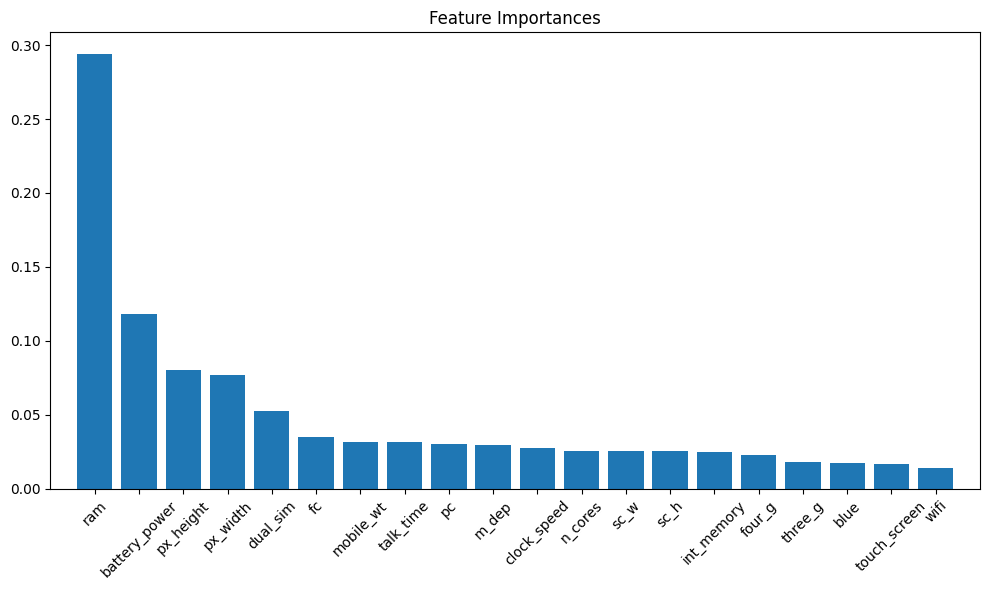

In [165]:
# Call the function to plot feature importance
plot_feature_importance(xgb_best_p, x.columns)

**Observation of the XGBoost Classifier**

Before tuning:

*  Training accuracy= 100%
*   test accuracy = 91%

The model is overfitted the training data and does not generalised so we tuned.

After tuning


*  Training accuracy= 100%
*  test accuracy = 91%

 achieving a training accuracy of 100% could be a sign of overfitting, where the model has memorized the training data and may not generalize well to new, unseen data. The fact that the test accuracy is not much lower than the training accuracy is a positive sign, as it indicates that the model is not severely overfitting. However, the goal is to achieve a good balance between training and test accuracy while avoiding overfitting.

###*SVM*

In [166]:
from sklearn.svm import SVC
svc = SVC(random_state= None)
svc.fit(x_train,y_train)

SVC()

In [167]:
#predicting values of y train and test set
y_train_pred =svc.predict(x_train)
y_test_pred =svc.predict(x_test)

In [168]:
# checking the accuracy score of the train set
accuracy_score(y_train,y_train_pred)

0.9567154678548695

In [169]:
# checking the accuracy score of the test set
accuracy_score(y_test,y_test_pred)

0.9440203562340967

In [170]:
# confusion matrix for test set
cf_matrix= confusion_matrix(y_test,y_test_pred)
cf_matrix

array([[ 89,   2,   0,   0],
       [  2,  94,   1,   0],
       [  0,   8,  88,   5],
       [  0,   0,   4, 100]])

In [171]:
#classification report for the train set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       403
           1       0.94      0.97      0.95       395
           2       0.95      0.91      0.93       390
           3       0.96      0.97      0.96       383

    accuracy                           0.96      1571
   macro avg       0.96      0.96      0.96      1571
weighted avg       0.96      0.96      0.96      1571



**let's tune some hyperparameters of SVC**

In [172]:
parameters = {'C':[0.1,1,10],'kernel':['linear','rbf']}

In [173]:
svc_tune = GridSearchCV(svc,parameters, cv= 5, verbose=2)
svc_tune.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   0.8s
[CV] END ...............................C=0.1, kernel=linear; total time=   1.4s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.7s
[CV] END ...............................C=0.1, kernel=linear; total time=   1.3s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.4s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.1s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.1s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.1s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.1s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.1s
[CV] END .................................C=1, kernel=linear; total time=   3.3s
[CV] END .................................C=1, ke

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             verbose=2)

In [174]:
svc_tune.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [175]:
# fitting model with best parameters
svc_best_p= SVC(C= 0.1, kernel= 'linear')
svc_best_p.fit(x_train,y_train)

SVC(C=0.1, kernel='linear')

In [176]:
#predicting values of y train and test set
y_train_pred =svc_best_p.predict(x_train)
y_test_pred =svc_best_p.predict(x_test)

In [177]:
# checking the accuracy score of the train set
accuracy_score(y_train,y_train_pred)

0.9853596435391471

In [178]:
# checking the accuracy score of the test set
accuracy_score(y_test,y_test_pred)

0.9796437659033079

In [179]:
# confusion matrix for test set
cf_matrix= confusion_matrix(y_test,y_test_pred)
cf_matrix

array([[ 88,   3,   0,   0],
       [  0,  97,   0,   0],
       [  0,   3,  98,   0],
       [  0,   0,   2, 102]])

In [180]:
#classification report for the train set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       403
           1       0.98      0.98      0.98       395
           2       0.97      0.98      0.98       390
           3       0.99      0.99      0.99       383

    accuracy                           0.99      1571
   macro avg       0.99      0.99      0.99      1571
weighted avg       0.99      0.99      0.99      1571



**Observation of the SVM Classifier**

Before tuning:

*  Training accuracy= 95%
*   test accuracy = 94%

The model is overfitted the training data and does not generalised so we tuned.

After tuning


*  Training accuracy= 98%
*  test accuracy = 97%

Overall, the SVM classifier seems to be performing well both before and after tuning. The tuning process has resulted in a slight improvement in both training and test accuracy, which is a positive outcome. It's important to strike a balance between training and test accuracy to ensure the model generalizes well to new data.

#*Conclusion*





* We started with Data understanding ,Data wrangling, basic EDA where we found the trends between prices range and other independent features.
* Implemented various classification algorithms , out of which SVM(Support vector machine) algothrithm gave the best performance after hyper-tuning.

*   KNN is the second best good model gave good performance after hyper-tunning.
*  We fine-tuned the chosen models' hyperparameters to optimize their performance. This involved using techniques like GridSearchCV to find the best combination of hyperparameters.

*   We evaluated the models using various metrics such as accuracy, precision, recall, F1-score, and confusion matrices. These metrics helped us assess the models' performance on both training and test data.
  







